In [4]:
# Import labraries
import pandas_datareader as pdr
import datetime
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [5]:
# Define the Tiingo API key and endpoint
api_key = 'cc5b4f23a973a298fc30effa82c8f84731803bf4'
ticker = 'GOOG'
# Define the start and end dates for fetching stock data
start_date = '2023-01-01' 
end_date = '2024-10-23'     
# Construct the URL with start and end dates
url = f'https://api.tiingo.com/tiingo/daily/{ticker}/prices?startDate={start_date}&endDate={end_date}'
# Fetch data with a custom timeout
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Token {api_key}'
}
try:
    response = requests.get(url, headers=headers, timeout=10)  # 10-second timeout
    response.raise_for_status()  # Raise an error for bad responses (4xx or 5xx)
    # Convert the response to a pandas DataFrame
    data = response.json()
    df = pd.DataFrame(data)
    # Display the DataFrame
    print(df.head())
except requests.exceptions.Timeout:
    print("The request timed out. Please try again later.")
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

                       date  close   high    low    open    volume   adjClose  \
0  2023-01-03T00:00:00.000Z  89.70  91.55  89.02  89.830  20738457  89.478874   
1  2023-01-04T00:00:00.000Z  88.71  91.24  87.80  91.010  27046483  88.491315   
2  2023-01-05T00:00:00.000Z  86.77  88.21  86.56  88.070  23136084  86.556097   
3  2023-01-06T00:00:00.000Z  88.16  88.47  85.57  87.360  26612628  87.942671   
4  2023-01-09T00:00:00.000Z  88.80  90.83  88.58  89.195  22996681  88.581093   

     adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  91.324314  88.800551  89.608554   20738457      0.0          1.0  
1  91.015078  87.583558  90.785645   27046483      0.0          1.0  
2  87.992548  86.346615  87.852893   23136084      0.0          1.0  
3  88.251907  85.359056  87.144643   26612628      0.0          1.0  
4  90.606089  88.361635  88.975119   22996681      0.0          1.0  


In [6]:
# Convert the DataFrame to csv file
df.to_csv('GOOG.csv')

In [7]:
# Read the CSV file
df = pd.read_csv('GOOG.csv')

In [8]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2023-01-03T00:00:00.000Z,89.70,91.55,89.02,89.830,20738457,89.478874,91.324314,88.800551,89.608554,20738457,0.0,1.0
1,1,2023-01-04T00:00:00.000Z,88.71,91.24,87.80,91.010,27046483,88.491315,91.015078,87.583558,90.785645,27046483,0.0,1.0
2,2,2023-01-05T00:00:00.000Z,86.77,88.21,86.56,88.070,23136084,86.556097,87.992548,86.346615,87.852893,23136084,0.0,1.0
3,3,2023-01-06T00:00:00.000Z,88.16,88.47,85.57,87.360,26612628,87.942671,88.251907,85.359056,87.144643,26612628,0.0,1.0
4,4,2023-01-09T00:00:00.000Z,88.80,90.83,88.58,89.195,22996681,88.581093,90.606089,88.361635,88.975119,22996681,0.0,1.0


In [9]:
# Take the column close ans resert all index
df1 = df.reset_index()['close']

In [10]:
# Check the size of df1
df1.shape

(455,)

In [11]:
# show the the dataFrame close
df1

0       89.70
1       88.71
2       86.77
3       88.16
4       88.80
        ...  
450    164.51
451    165.05
452    165.80
453    166.82
454    164.48
Name: close, Length: 455, dtype: float64

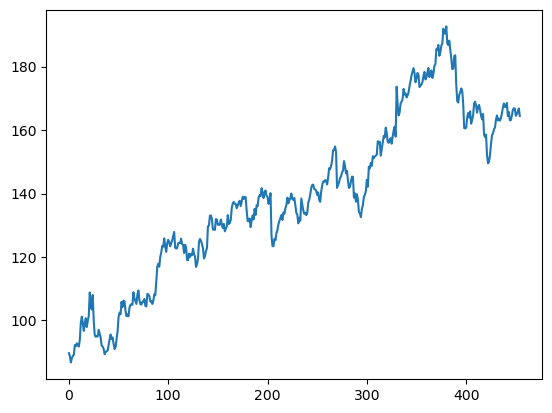

In [12]:
# Plot a histogramme for the df1
plt.plot(df1)

In [13]:
# Create a MinMaxScaler instance to scale data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0,1))
# Transform df1 by fitting the scaler and reshaping the data to a 2D array
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
# Chekc the size of df1
df1.shape

(455, 1)

In [15]:
# show the df1 after transformation by filting the scaler
df1

array([[0.02767022],
       [0.0183209 ],
       [0.        ],
       [0.01312683],
       [0.01917084],
       [0.02332609],
       [0.05184626],
       [0.04854094],
       [0.05694589],
       [0.05090188],
       [0.04731325],
       [0.06742846],
       [0.11814147],
       [0.13636793],
       [0.1174804 ],
       [0.09405987],
       [0.11700822],
       [0.13164605],
       [0.10558126],
       [0.12371329],
       [0.13844556],
       [0.20804609],
       [0.17423742],
       [0.15771083],
       [0.20086883],
       [0.12494098],
       [0.0820663 ],
       [0.07640004],
       [0.07772216],
       [0.07724998],
       [0.09755407],
       [0.0850883 ],
       [0.07385022],
       [0.04986307],
       [0.04750212],
       [0.04060818],
       [0.02436491],
       [0.03144773],
       [0.03333648],
       [0.03531967],
       [0.05231844],
       [0.06846728],
       [0.08319955],
       [0.06988384],
       [0.07441685],
       [0.05562376],
       [0.04004155],
       [0.046

In [16]:
 # Spliting dataset into train data and test data
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # Creating a sequence of 'time_step' data points
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [18]:
# reshape 
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
# Show X_train
X_train

array([[0.02767022, 0.0183209 , 0.        , ..., 0.3448862 , 0.32930399,
        0.35489659],
       [0.0183209 , 0.        , 0.01312683, ..., 0.32930399, 0.35489659,
        0.36509585],
       [0.        , 0.01312683, 0.01917084, ..., 0.35489659, 0.36509585,
        0.35763528],
       ...,
       [0.49069789, 0.49796959, 0.49513646, ..., 0.50363585, 0.478421  ,
        0.50061384],
       [0.49796959, 0.49513646, 0.51874587, ..., 0.478421  , 0.50061384,
        0.48455945],
       [0.49513646, 0.51874587, 0.50543016, ..., 0.50061384, 0.48455945,
        0.44791765]])

In [20]:
# reshape input to be sample, time steps features which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
# Create the Stocked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM 

In [22]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train, y_train, validation_data = (X_test,ytest),epochs = 100, batch_size=64, verbose = 1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 582ms/step - loss: 0.1881 - val_loss: 0.1215
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 0.0245 - val_loss: 0.0381
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 0.0220 - val_loss: 0.0276
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.0085 - val_loss: 0.0650
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.0143 - val_loss: 0.0327
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - loss: 0.0067 - val_loss: 0.0035
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.0047 - val_loss: 0.0162
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.0027 - val_loss: 0.0295
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.0043 - val_loss: 0.0231
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.0026 - val_loss: 0.0136
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 0.

In [25]:
 # Predection and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [26]:
# Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

134.76519444478578

In [30]:
# Tset Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

160.38803267337948

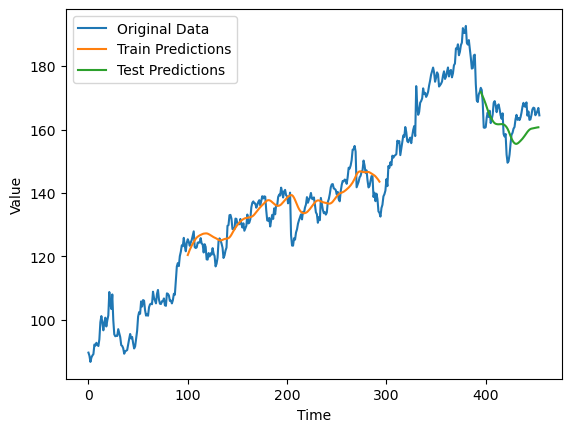

In [32]:
look_back = 100  
# Prepare an empty array for plotting train predictions, same shape as df1
train_predictPlot = np.empty_like(df1)
train_predictPlot[:, :] = np.nan  
# Shift train predictions for plotting, starting after 'look_back'
train_predictPlot[look_back:len(train_predict) + look_back, :] = train_predict
# Prepare an empty array for plotting test predictions, same shape as df1
test_PredictPlot = np.empty_like(df1)
test_PredictPlot[:, :] = np.nan  # Fill with NaN for unused spaces
# Shift test predictions for plotting, starting after train predictions and an additional look_back window
test_PredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict
# Plot baseline (original data) and predictions
plt.plot(scaler.inverse_transform(df1), label='Original Data')  
plt.plot(test_PredictPlot, label='Test Predictions')  
# Add labels, legend, and show the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [48]:
len(test_data)

160

In [49]:
x_input = test_data[60:].reshape(1,-1)
x_input.shape

(1, 100)

In [50]:
x_input = test_data[60:].reshape(1,-1)

In [51]:
x_input.shape

(1, 100)

In [52]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [53]:
temp_input

[0.8277457739163282,
 0.8344508452167344,
 0.8527717442629142,
 0.864859760128435,
 0.8421947303805836,
 0.8486164888091415,
 0.8633487581452451,
 0.8762867126263104,
 0.8496553026725849,
 0.8650486353763339,
 0.8689205779582586,
 0.8469166115780525,
 0.8588157521956749,
 0.8828973463027668,
 0.8879025403720843,
 0.933138162243838,
 0.931154972140901,
 0.9452261781093588,
 0.9127396354707714,
 0.9228444612333554,
 0.9428652375106245,
 0.9502313721786758,
 0.9933893663235435,
 0.9794125979790348,
 0.9790348474832372,
 0.9999999999999999,
 0.9493814335631318,
 0.9444706771177637,
 0.9577863820946265,
 0.9323826612522429,
 0.9051846255548212,
 0.8730758334120313,
 0.8746812730191708,
 0.9120785721031258,
 0.9144395127018604,
 0.8272735857965815,
 0.7780715837189537,
 0.7735385777693834,
 0.7966757956369818,
 0.8035697421852867,
 0.815752195674757,
 0.8091415619983001,
 0.7708943242988008,
 0.6976107281140805,
 0.6966663518745867,
 0.6986495419775239,
 0.7278307677778827,
 0.74246859949003

In [54]:
# demonstrate prediction for next 10 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.6991984]
101
1 day input [0.83445085 0.85277174 0.86485976 0.84219473 0.84861649 0.86334876
 0.87628671 0.8496553  0.86504864 0.86892058 0.84691661 0.85881575
 0.88289735 0.88790254 0.93313816 0.93115497 0.94522618 0.91273964
 0.92284446 0.94286524 0.95023137 0.99338937 0.9794126  0.97903485
 1.         0.94938143 0.94447068 0.95778638 0.93238266 0.90518463
 0.87307583 0.87468127 0.91207857 0.91443951 0.82727359 0.77807158
 0.77353858 0.7966758  0.80356974 0.8157522  0.80914156 0.77089432
 0.69761073 0.69666635 0.69864954 0.72783077 0.7424686  0.72886958
 0.74756823 0.71073756 0.72150345 0.73633015 0.77089432 0.77618283
 0.76362263 0.74341298 0.76173387 0.76645576 0.75181792 0.73406365
 0.72367551 0.73982435 0.67843989 0.67088488 0.67834545 0.61724431
 0.59278497 0.59722353 0.61743319 0.64944754 0.67617339 0.68202852
 0.69421097 0.69921617 0.72216451 0.73538578 0.72055907 0.72594202
 0.71980357 0.72773633 0.74152422 0.75946737 0.7710832  0.76060062
 0.75965625 0.77240533 0.73302484 

In [55]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [56]:
len(df1)

455

In [57]:
df3 = df1.tolist()
df3.extend(lst_output)

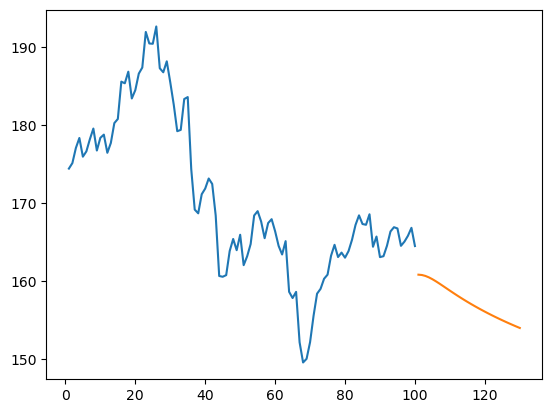

In [60]:
# Plotting the actual data (day_new) and predicted data (lst_output)
plt.plot(day_new, scaler.inverse_transform(df1[355:]))  
# Plot predicted values (lst_output) after inverse transformation
plt.plot(day_pred, scaler.inverse_transform(lst_output))  
# Show the plot
plt.show()


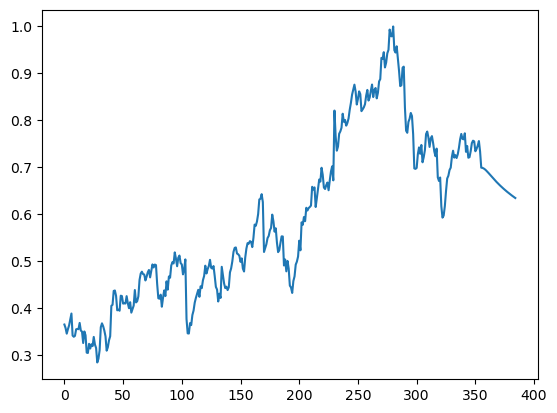

In [63]:
# Convert df1 to a list and extend it with the predicted lst_output
df3 = df1.tolist()  
df3.extend(lst_output) 
# Plot the extended data starting from index 1000
plt.plot(df3[100:])
# Show the plot
plt.show()